In [43]:
# %% [markdown]
# # Data Check Analysis
#
# Bu notebook, `data_check` modülünü kullanarak ham veri setlerinin kalitesini kontrol eder ve raporlar.

In [44]:
# %%
import logging
import os
import sys
import pandas as pd
import glob
import re

In [45]:
# %%
# Projeye özel local script import:
sys.path.append(os.path.abspath("../source"))

In [46]:
# %%
from source.data_check import check_raw_data
from source.utils.config_loader import load_config
from source.utils.logger import setup_logger

In [47]:
# %%
# %% [markdown]
# ## Load Configuration

In [48]:
# %%
config_path = os.path.join(os.path.abspath("../config"), "settings.yml")
config = load_config(config_path)

if config is None:
    logging.error("Failed to load configuration. Terminating notebook.")
    sys.exit(1)

RAW_DIR = os.path.abspath(config["paths"]["raw_dir"])
LOG_DIR = config["paths"].get("logs_dir", "../logs")

os.makedirs(LOG_DIR, exist_ok=True)

logger = setup_logger(
    name="data_check_notebook",
    log_file=os.path.join(LOG_DIR, "data_check_notebook.log"),
    log_level=config.get("logging", {}).get("level", "INFO").upper()
)

logger.info("=== Data Check Notebook Initialized ===")

2025-01-10 18:30:58,453 - data_check_notebook - INFO - === Data Check Notebook Initialized ===


In [49]:
# %%
# %% [markdown]
# ## Perform Data Check

In [50]:
# %%
check_raw_data(raw_dir=RAW_DIR)

2025-01-10 18:31:00,709 - data_check - INFO - === Starting data check ===
2025-01-10 18:31:00,719 - data_check - INFO - [QuickCheck] File=/Users/dogaaydin/PycharmProjects/Geo_Sentiment_Climate/data/raw/epa-so2-2023/epa_so2_virginia_2023.csv, Shape=(2877, 21), Missing={'Date': 0, 'Source': 0, 'Site ID': 0, 'POC': 0, 'Daily Max 1-hour SO2 Concentration': 0, 'Units': 0, 'Daily AQI Value': 0, 'Local Site Name': 352, 'Daily Obs Count': 0, 'Percent Complete': 0, 'AQS Parameter Code': 0, 'AQS Parameter Description': 0, 'Method Code': 0, 'CBSA Code': 0, 'CBSA Name': 0, 'State FIPS Code': 0, 'State': 0, 'County FIPS Code': 0, 'County': 0, 'Site Latitude': 0, 'Site Longitude': 0}
2025-01-10 18:31:00,723 - data_check - INFO - [QuickCheck] File=/Users/dogaaydin/PycharmProjects/Geo_Sentiment_Climate/data/raw/epa-so2-2023/epa_so2_kansas_2023.csv, Shape=(1350, 21), Missing={'Date': 0, 'Source': 0, 'Site ID': 0, 'POC': 0, 'Daily Max 1-hour SO2 Concentration': 0, 'Units': 0, 'Daily AQI Value': 0, 'Loca

In [51]:
# %%
# %% [markdown]
# ## Load and Display Report

In [52]:
# %%
# Find the latest report in the processed directory
processed_dir = os.path.abspath(config["paths"]["processed_dir"])
report_files = glob.glob(os.path.join(processed_dir, "data_check_report_*.csv"))

if not report_files:
    logger.warning("No report files found in the processed directory.")
else:
    latest_report = max(report_files, key=os.path.getctime)
    logger.info(f"Loading the latest report: {latest_report}")
    df_report = pd.read_csv(latest_report)
    display(df_report)

2025-01-10 18:31:06,387 - data_check_notebook - INFO - Loading the latest report: /Users/dogaaydin/PycharmProjects/Geo_Sentiment_Climate/data/processed/data_check_report_20250110_183102.csv


,file_path,row_count,col_count,columns,empty_file,test_pass,notes
0,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,2877,21,"Date, Source, Site ID, POC, Daily Max 1-hour S...",False,True,NaN
1,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,1350,21,"Date, Source, Site ID, POC, Daily Max 1-hour S...",False,True,NaN
2,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,2327,21,"Date, Source, Site ID, POC, Daily Max 1-hour S...",False,True,NaN
3,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,360,21,"Date, Source, Site ID, POC, Daily Max 1-hour S...",False,True,NaN
4,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,1398,21,"Date, Source, Site ID, POC, Daily Max 1-hour S...",False,True,NaN
...,...,...,...,...,...,...,...
510,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,1019,21,"Date, Source, Site ID, POC, Daily Max 1-hour N...",False,False,Missing columns: ['Daily Max 1-hour SO2 Conce...
511,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,5000,21,"Date, Source, Site ID, POC, Daily Max 1-hour N...",False,False,Missing columns: ['Daily Max 1-hour SO2 Conce...
512,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,1065,21,"Date, Source, Site ID, POC, Daily Max 1-hour N...",False,False,Missing columns: ['Daily Max 1-hour SO2 Conce...
513,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,2381,21,"Date, Source, Site ID, POC, Daily Max 1-hour N...",False,False,Missing columns: ['Daily Max 1-hour SO2 Conce...


In [53]:
# %%
# %% [markdown]
# ## Summary Statistics

In [54]:
# %%
if not df_report.empty:
    summary = df_report.describe(include='all').transpose()
    display(summary)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
file_path,515,515,/Users/dogaaydin/PycharmProjects/Geo_Sentiment...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
row_count,515.0,NaN,NaN,NaN,2841.196117,1797.826766,46.0,1023.0,2617.0,5000.0,5000.0
col_count,515.0,NaN,NaN,NaN,21.205825,0.404696,21.0,21.0,21.0,21.0,22.0
columns,515,5,"Date, Source, Site ID, POC, Daily Mean PM2.5 C...",106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
empty_file,515,1,False,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_pass,515,2,False,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
notes,411,1,Missing columns: ['Daily Max 1-hour SO2 Conce...,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# %%
# %% [markdown]
# ## Visualization

In [56]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Ensure plots are rendered inline
%matplotlib inline

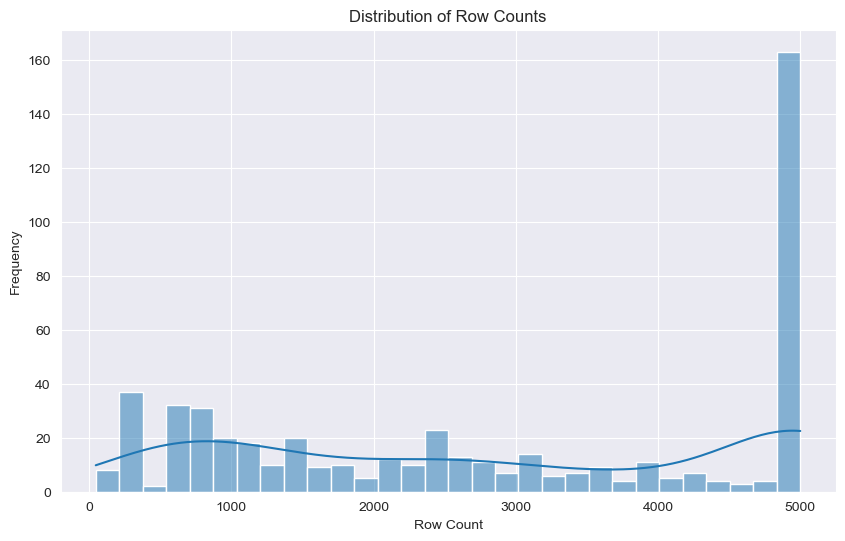

In [58]:
# Histogram of row counts
plt.figure(figsize=(10, 6))
sns.histplot(df_report['row_count'].dropna(), bins=30, kde=True)
plt.title("Distribution of Row Counts")
plt.xlabel("Row Count")
plt.ylabel("Frequency")
plt.show()

In [61]:
# %%
# Boxplot of missing values in the first few files
quick_check = df_report[df_report.index < config["data_check"].get("quick_check_limit", 5)]
missing_values = quick_check['notes'].str.extractall(r"Missing columns: \[(.*?)\]")
missing_values.columns = ['missing_columns']
missing_values = missing_values['missing_columns'].dropna().str.split(',', expand=True).stack().str.strip().value_counts()

AttributeError: Can only use .str accessor with string values!

In [65]:
# astype(str) function before attempting to replace any values
quick_check['notes'] = quick_check['notes'].astype(str).replace('nan', '').copy()


/var/folders/3d/pcm3nnt50014458st0w8xnyh0000gn/T/ipykernel_25197/4038470275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_check['notes'] = quick_check['notes'].astype(str).replace('nan', '').copy()


In [66]:
print(df_report['notes'].dtype)


object


In [67]:
non_string_mask = ~df_report['notes'].apply(lambda x: isinstance(x, str))
non_string_values = df_report.loc[non_string_mask, 'notes']
print(non_string_values)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
Name: notes, Length: 104, dtype: object


In [68]:
# %% [5] Boxplot of Missing Values in the First Few Files

# DataFrame dilimini kopyalayarak bağımsız bir kopya oluşturun
quick_check = df_report[df_report.index < config["data_check"].get("quick_check_limit", 5)].copy()

# 'notes' sütununu string'e dönüştürün ve NaN değerlerini boş string ile değiştirin
quick_check['notes'] = quick_check['notes'].astype(str).replace('nan', '')


In [69]:
# 'notes' sütununu string'e dönüştürün ve NaN değerlerini boş string ile değiştirin
quick_check['notes'] = quick_check['notes'].astype(str).replace('nan', '')


In [70]:
quick_check['notes'] = quick_check['notes'].astype(str).fillna('')


In [35]:
non_string_mask = ~df_report['notes'].apply(lambda x: isinstance(x, str))
non_string_values = df_report.loc[non_string_mask, 'notes']
print(non_string_values)


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
Name: notes, Length: 104, dtype: object


In [75]:
# Sütundaki tüm benzersiz veri türlerini kontrol edin
unique_types = quick_check['notes'].apply(type).unique()
print("Unique types in 'notes' column:", unique_types)


Unique types in 'notes' column: [<class 'str'>]


In [76]:
# 'notes' sütunundaki ilk 10 değeri inceleyin
print("First 10 entries in 'notes' column:")
print(quick_check['notes'].head(10))


First 10 entries in 'notes' column:
0    
1    
2    
3    
4    
Name: notes, dtype: object


In [77]:
# Boş veya sadece boşluk içeren değerleri kontrol edin
empty_mask = quick_check['notes'].str.strip() == ''
print("Number of empty 'notes' entries:", empty_mask.sum())


Number of empty 'notes' entries: 5


In [78]:
# Eksik sütunları lambda fonksiyonu ile çekme
missing_values = quick_check['notes'].apply(lambda x: re.findall(r"Missing columns: \[(.*?)\]", x))
missing_values = missing_values.explode().dropna()
missing_values = missing_values.apply(lambda x: [col.strip() for col in x.split(',')])
missing_columns = missing_values.explode().value_counts()

print(missing_columns)


Series([], Name: count, dtype: int64)


In [80]:
import re

try:
    missing_values = quick_check['notes'].apply(lambda x: re.findall(r"Missing columns: \[(.*?)\]", x))
    missing_values = missing_values.explode().dropna()
    missing_values = missing_values.apply(lambda x: [col.strip() for col in x.split(',')])
    missing_columns = missing_values.explode().value_counts()
    print(missing_columns)
except AttributeError as e:
    logger.error(f"AttributeError encountered: {e}")
    raise
except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")
    raise


Series([], Name: count, dtype: int64)


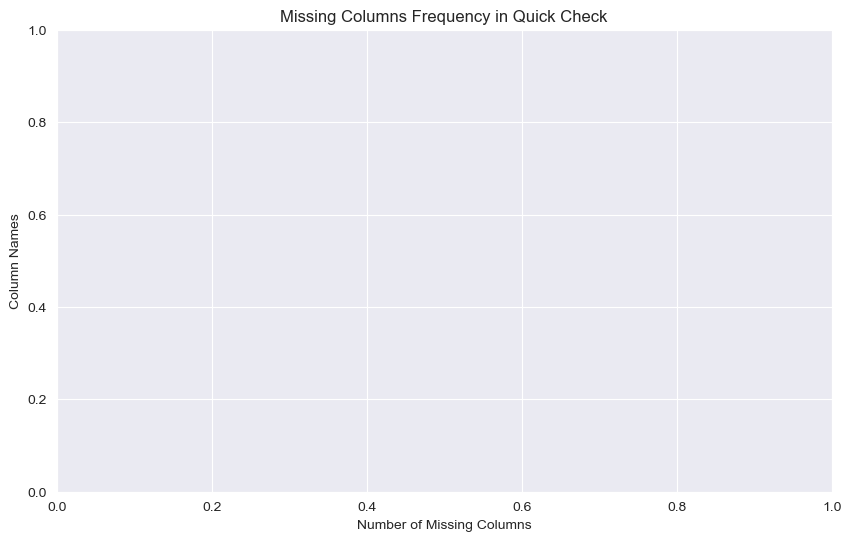

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("Missing Columns Frequency in Quick Check")
plt.xlabel("Number of Missing Columns")
plt.ylabel("Column Names")
plt.show()